# Anomaly Detection - Kmeans

In [1]:
import turicreate as tc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

/Users/pedrohserrano/anaconda3/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Sometimes is normal to find databases or datasets in web repositories, in general, the most common way to access is via API, in many other cases, the data can be accessed through the link URL.

We utilize the Dutch portal for official distribution of data sources, part of the
[Ministry of the Interior and Kingdom Relations](https://data.overheid.nl/data/dataset) web page, where we can find tons of datasets in different formats, for many distinct applications.

It is important to automate the collection of the data. A good method is creating a function to make the [web service](https://en.wikipedia.org/wiki/Web_service) request, as shown below.

For convenience, we are going to focus on crime data in this example.

### Deaths; murder, crime scene in The Netherlands

This table contains the number of persons died as a result of murder or manslaughter, where the crime scene is located in the Netherlands. The victims can be residents or non-residents. The data can be split by location of the crime, method, age and sex. The date of death is the criterion, the date of the act can be in the previous year. The ICD10 codes that belong to murder and manslaughter are X85-Y09.  

[Open Data Source](https://data.overheid.nl/data/dataset/deaths-murder-and-manslaughter-crime-scene-in-the-netherlands)  
[License](https://data.overheid.nl/licenties-voor-hergebruik) CC-BY 4.0

In [2]:
df_crime_pop = pd.read_csv('../datasets/crime_population_netherlands.csv')

The municipalities names, region and population are missing, we might go for an additional source

In [3]:
# Sometime you just need a little bit of imagination, List of municipalities
#df_population = pd.read_csv('https://s3.eu-west-3.amazonaws.com/pedrohserrano-datasets/population-netherlands.tsv', sep='\t')

### Explore Distribution

How is related the crime and the types of crime with the population?

***Try .head() .describe()***

In [4]:
#plt.figure(figsize=[16, 8])
#sns.kdeplot(df_population['Population'], shade=True, color="r", label='Population')
#plt.title('Distribution of Population The Netherlands'); plt.legend()

### Datasets Merge

In [5]:
# Merge the crimes table and population table
#df_crime_pop = pd.merge(df_crimes, df_population, on='CBScode', how='left')
#df_crime_pop = df_crime_pop.replace([np.inf, -np.inf], np.nan)
#df_crime_pop.fillna(0, inplace=True)

In [6]:
df_crime_pop.sort_values('CBScode').head(10)

,CBScode,Municipality,Province,Population,Population_density(p/km),"HIC: Theft / burglary dwelling, complete","HIC: Theft / burglary dwelling, attempts",HIC: Violent Crime,HIC: Street Roof,HIC: Robberies,...,Theft / burglary companies / institutions,Theft / burglary garage / barn / shed,Drug trafficking,Trespassing,mistreatment,Overt violence (person),Or destruction. cause damage,Arms Trade,pickpocketing,morals Felony
17,GM0003,Appingedam,Groningen,12049,507,24,12,67,0,1,...,56,6,2,0,40,0,54,1,3,3
25,GM0005,Bedum,Groningen,10475,236,10,2,19,0,0,...,2,3,1,0,14,0,44,0,1,6
29,GM0007,Bellingwedde,Groningen,8908,86,13,4,30,0,0,...,3,8,2,1,18,0,35,1,0,0
48,GM0009,"Boer, TenTen Boer",Groningen,7465,165,7,0,9,0,0,...,12,2,0,0,5,0,24,0,1,0
73,GM0010,Delfzijl,Groningen,25686,198,49,27,158,1,1,...,45,15,9,4,100,9,151,7,9,18
119,GM0014,Groningen,Groningen,198108,2474,696,181,1454,46,16,...,491,253,184,59,906,46,1506,50,574,171
120,GM0015,Grootegast,Groningen,12193,141,12,2,18,0,0,...,10,5,3,0,12,2,34,0,0,2
132,GM0017,Haren,Groningen,18790,405,63,20,42,1,0,...,32,11,4,2,18,0,70,1,8,5
158,GM0018,Hoogezand-Sappemeer,Groningen,34360,521,72,21,163,1,3,...,44,39,22,0,98,2,220,3,9,30
182,GM0022,Leek,Groningen,19607,307,33,5,41,0,2,...,22,9,10,2,23,3,91,2,5,11


In [7]:
#df_crime_pop.to_csv('', index=True)

In [8]:
df_crime_pop.describe()

,Population,Population_density(p/km),"HIC: Theft / burglary dwelling, complete","HIC: Theft / burglary dwelling, attempts",HIC: Violent Crime,HIC: Street Roof,HIC: Robberies,Undermining public order,Threat,Fire / Explosion,...,Theft / burglary companies / institutions,Theft / burglary garage / barn / shed,Drug trafficking,Trespassing,mistreatment,Overt violence (person),Or destruction. cause damage,Arms Trade,pickpocketing,morals Felony
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,...,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,43159.884615,811.246154,97.979487,44.251282,205.753846,10.679487,2.905128,13.982051,77.861538,12.217949,...,68.605128,47.425641,32.028205,5.912821,118.461538,9.430769,242.928205,12.528205,65.148718,18.797436
std,67418.318090,973.824887,219.387051,103.767480,561.367584,76.075239,11.653689,66.946567,220.825994,23.945980,...,196.133507,90.476564,93.849175,18.895807,315.458995,28.402434,466.102905,43.284056,434.852773,42.000092
min,938.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000
25%,17742.000000,225.250000,27.000000,10.000000,41.000000,0.000000,0.000000,1.000000,16.000000,2.000000,...,17.000000,12.000000,5.000000,0.000000,24.000000,1.000000,64.000000,2.000000,3.000000,4.000000
50%,26046.500000,415.000000,45.500000,18.000000,78.000000,1.000000,1.000000,3.000000,31.000000,5.000000,...,29.000000,25.000000,12.000000,1.000000,44.500000,3.000000,115.500000,4.000000,8.000000,9.000000
75%,44371.500000,998.000000,84.750000,37.000000,156.000000,4.000000,2.000000,7.000000,60.000000,12.000000,...,55.750000,44.750000,24.750000,4.000000,90.750000,7.000000,227.000000,9.000000,21.000000,17.000000
max,853312.000000,6131.000000,2962.000000,1351.000000,7645.000000,1331.000000,176.000000,1115.000000,3017.000000,243.000000,...,3264.000000,997.000000,1293.000000,265.000000,4356.000000,403.000000,4956.000000,556.000000,8009.000000,530.000000


Next, let's create a **scatterplot matrix**. Scatterplot matrices plot the distribution of each column along the diagonal, and then plot a scatterplot matrix for the combination of each variable. They make for an efficient tool to look for errors in our data.

We can even have the plotting package color each entry by its class to look for trends within the classes.

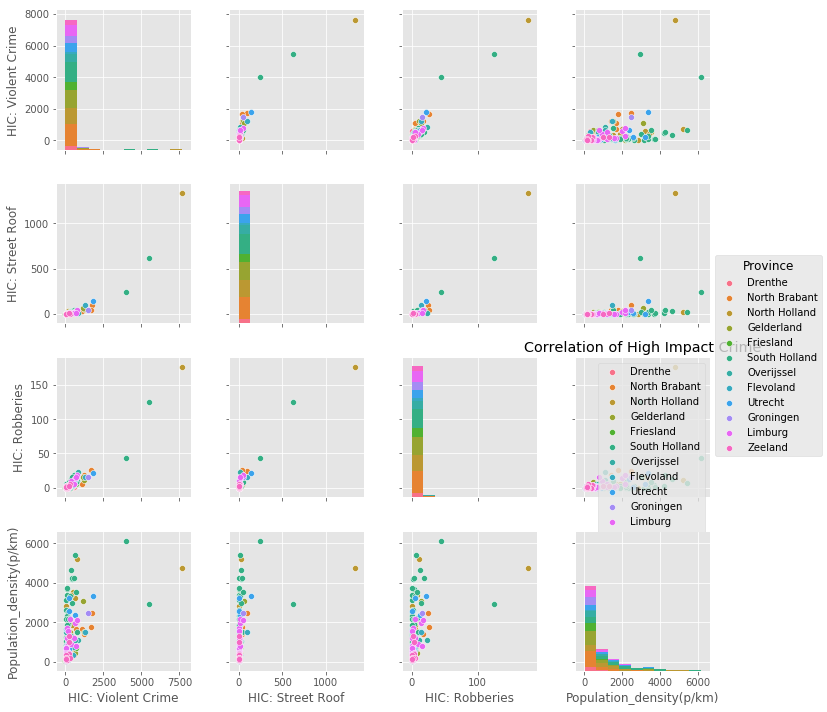

In [9]:
df_plot = df_crime_pop[['HIC: Violent Crime','HIC: Street Roof', 'HIC: Robberies', 'Population_density(p/km)', 'Province']]
sns.pairplot(df_plot, hue="Province")
plt.title('Correlation of High Impact Crime')
plt.legend()

#### Correlation Violent crimes vs Population Density

In [10]:
df_plot = df_crime_pop[['HIC: Violent Crime','Arms Trade']]

In [11]:
df_plot = df_plot[(df_plot['Arms Trade'] < 10 ) & (df_plot['HIC: Violent Crime'] < 200) ]

Text(0.5,1,'Relation')

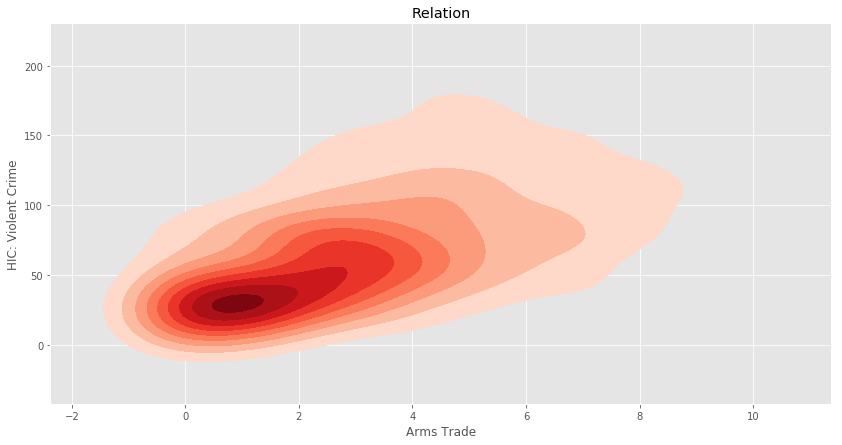

In [12]:
plt.figure(figsize=[14, 7])
sns.kdeplot(df_plot['Arms Trade'], df_plot['HIC: Violent Crime'], cmap="Reds", shade=True, shade_lowest=False)
plt.title('Relation')

---
## K-means Method

The most basic usage of K-means clustering requires only a choice for the number of clusters, . We rarely know the correct number of clusters a priori, but the following simple heuristic sometimes works well:  

where is the number of rows in your dataset. By default, the maximum number of iterations is 10, and all features in the input dataset are used

In [13]:
sf = tc.SFrame(data=df_crime_pop.loc[:, df_crime_pop.columns != 'Population']._get_numeric_data())

***Write the formula for k***

In [14]:
K= 3

In [15]:
print('Number of Clusters K: {}'.format(K))

Number of Clusters K: 3


In [16]:
kmeans_model = tc.kmeans.create(sf, num_clusters=K)

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 199       |

| 1             | 136       |

| 2             | 127       |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 10                            |

| 2         | 4                             |

| 3         | 1                             |

| 4         | 1                             |

In [17]:
kmeans_model.summary

| 5         | 0                             |

+-----------+-------------------------------+

<bound method Model.summary of Class                            : KmeansModel

Schema
------
Number of clusters               : 3
Number of examples               : 390
Number of feature columns        : 22
Number of unpacked features      : 22
Row label name                   : row_id

Training Summary
----------------
Training method                  : elkan
Number of training iterations    : 5
Batch size                       : 390
Total training time (seconds)    : 1.0792

Accessible fields
-----------------
cluster_id                      : An SFrame containing the cluster assignments.
cluster_info                    : An SFrame containing the cluster centers.>

The model summary shows the usual fields about model schema, training time, and training iterations. It also shows that the K-means results are returned in two SFrames contained in the model: `cluster_id` and `cluster_info`. The cluster_info SFrame indicates the final cluster centers, one per row, in terms of the same features used to create the model.

The last three columns of the cluster_info SFrame indicate metadata about the corresponding cluster: ID number, number of points in the cluster, and the within-cluster sum of squared distances to the center.

In [18]:
kmeans_model.cluster_info[['cluster_id', 'size', 'sum_squared_distance']].print_rows(num_rows=14, num_columns=3)

+------------+------+----------------------+
| cluster_id | size | sum_squared_distance |
+------------+------+----------------------+
|     0      | 334  |  80065397.48583984   |
|     1      |  52  |   123932829.765625   |
|     2      |  4   |     127391758.5      |
+------------+------+----------------------+
[3 rows x 3 columns]



The `cluster_id` field of the model shows the cluster assignment for each input data point, along with the Euclidean distance from the point to its assigned cluster's center.

In [19]:
clusters = kmeans_model.cluster_id

***Which are the anomalous points?***

***What do they have in common within anomalous clusters?***

# Anomaly Detection - DBSCAN

In [20]:
import turicreate as tc

In [21]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [23]:
#sf = tc.SFrame('https://s3.eu-west-3.amazonaws.com/pedrohserrano-datasets/sensor_data.csv')
#sf = sf[['0','1']]

***Try methods and different parameters***

---
Like the K-means model, the assignments of points to clusters is in the models' cluster-id field. The second column shows the cluster assignment for the row index of the input data indicated by the first column. The third column shows whether DBSCAN considers the point core, boundary, or noise. Noise points are not assigned to a cluster, which is encoded as a "missing" value in the 'cluster_id' column.

Because we generated 2D data, we can plot it and color the points according to the cluster assignments generated by our DBSCAN model. The first step is to join the cluster results back to the original data. Please note: DBSCAN scrambles the row order.

In [ ]:
sf = sf.add_row_number('row_id')
sf = sf.join(dbscan_model.cluster_id, on='row_id', how='left')
sf = sf.rename({'cluster_id': 'dbscan_id'})

In [ ]:
core_mask = sf['type'] == 'core'
boundary_mask = sf['type'] == 'boundary'
anomalies_mask = sf['type'] == 'noise'

In [ ]:
plt.figure(figsize=[14, 10])
plt.scatter(sf['0'][core_mask], sf['1'][core_mask], s=80, alpha=0.9, c=sf['dbscan_id'][core_mask], cmap=plt.cm.Set1)
plt.scatter(sf['0'][boundary_mask], sf['1'][boundary_mask], s=40, alpha=0.7, c=sf['dbscan_id'][boundary_mask], cmap=plt.cm.Set1)
plt.scatter(sf['0'][anomalies_mask], sf['1'][anomalies_mask], s=40, alpha=0.7, c='black')

***Compare results with k-means***